In [12]:


import torch
import torchvision
import torchvision.transforms as transforms
import os
import numpy as np
     
from torchvision.io import read_image
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import matplotlib
from torch import nn
import cv2
from PIL import Image
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")
%load_ext line_profiler
plt.ion()   # interactive mode

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [717]:

#Create the data loader
class DataLoader(Dataset):
    def __init__(self, img_dir, img_dir2, transform = None, target_transform=None):
        self.img_dir = img_dir
        self.img_dir2 = img_dir2
        self.transform = transform
        self.fileNames = os.listdir(img_dir)
    def __len__(self):
        return len(os.listdir(self.img_dir))

    def __getitem__(self, idx):
        label = self.fileNames[idx].rsplit("t-mask-", 1 )[1]
        img_path = os.path.join(self.img_dir, self.fileNames[idx])
        img_path2 = os.path.join(self.img_dir2, label)
        image = read_image(img_path)
        image2 = read_image(img_path2)
        image = torch.tensor(image).float()
        image2 = torch.tensor(image2).float()
        if self.transform:
            image = self.transform(image)
            image2 = self.transform(image2)
        return image, image2

In [ ]:

#Create the data loader
class DataLoader4(Dataset):
    def __init__(self, img_dir, img_dir2, transform = None, target_transform=None):
        self.img_dir = img_dir
        self.img_dir2 = img_dir2
        self.transform = transform
        self.fileNames = os.listdir(img_dir)
    def __len__(self):
        return len(os.listdir(self.img_dir))

    def __getitem__(self, idx):
        label = self.fileNames[idx].rsplit("t-mask-", 1 )[1]
        img_path = os.path.join(self.img_dir, self.fileNames[idx])
        img_path2 = os.path.join(self.img_dir2, label)
        image = read_image(img_path)
        image2 = read_image(img_path2)
        if self.transform:
            image = self.transform(image)
            image2 = self.transform(image2)
        return image, image2
    


In [3]:
#Create the data loader
class DataLoader2(Dataset):
    def __init__(self, img_dir, img_dir2, transform = None, target_transform=None):
        self.img_dir = img_dir
        self.img_dir2 = img_dir2
        self.transform = transform
        self.fileNames = os.listdir(img_dir)
    def __len__(self):
        return len(os.listdir(self.img_dir))

    def __getitem__(self, idx):
        label = self.fileNames[idx].rsplit("t-mask-", 1 )[1]
        img_path = os.path.join(self.img_dir, self.fileNames[idx])
        img_path2 = os.path.join(self.img_dir2, label)
        image = cv2.imread(img_path)
        image2 = cv2.imread(img_path2)
        if self.transform:
            image = cv2.resize(image, (50,50))
            image2 = cv2.resize(image2,(50,50))
        return image, image2

In [13]:
#Create the data loader
class DataLoader3(Dataset):
    def __init__(self, img_dir, img_dir2, transform = None, target_transform=None):
        self.img_dir = img_dir
        self.img_dir2 = img_dir2
        self.transform = transform
        self.fileNames = os.listdir(img_dir)
    def __len__(self):
        return len(os.listdir(self.img_dir))

    def __getitem__(self, idx):
        label = self.fileNames[idx].rsplit("t-mask-", 1 )[1]
        img_path = os.path.join(self.img_dir, self.fileNames[idx])
        img_path2 = os.path.join(self.img_dir2, label)
        image = np.asarray(Image.open(img_path))
        image2 = np.asarray(Image.open(img_path2))
        if self.transform:
            image = cv2.resize(image, (50,50))
            image2 = cv2.resize(image2,(50,50))
        return image, image2

In [35]:
dataset = DataLoader3("../Data/with_mask", "../Data/without_mask", transform = transforms.Resize((100,100)))

In [36]:
dataset.__len__()

10000

torch.Size([50, 50, 3])


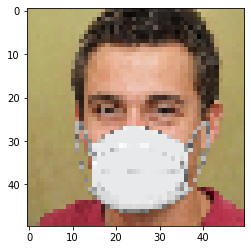

TypeError: Invalid shape (50, 3, 50) for image data

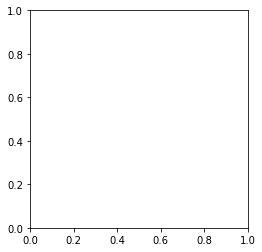

In [38]:
#Test the data loader
batch_size = 2
trainloader = torch.utils.data.DataLoader(dataset, 
                                          batch_size=batch_size, 
                                          shuffle=True, 
                                          num_workers=0)

# get some images
dataiter = iter(trainloader)
images, images2 = dataiter.next()

print(images[0].size())

for i in range(2): #Run through 2 bathes
    images, images2 = dataiter.next()
    for image, image2 in zip(images,images2): # Run through all samples in a batch
        plt.figure()
        plt.imshow(np.transpose(image.numpy(), (0, 1, 2)))
        plt.show()
        plt.figure()
        plt.imshow(np.transpose(image2.numpy(), (1, 2, 0)))
        plt.show()


In [7]:
# simple network
# this does not work well at all
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5, stride=1, padding=2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=6, kernel_size=5, stride=1, padding=2)
        self.conv3 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5, stride=1, padding=2)
        self.conv4 = nn.Conv2d(in_channels=12, out_channels=6, kernel_size=5, stride=1, padding=2)
        self.conv5 = nn.Conv2d(in_channels=6, out_channels=3, kernel_size=5, stride=1, padding=2)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)


    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)
        return x

model = Net()


In [111]:
dataiter = iter(trainloader)


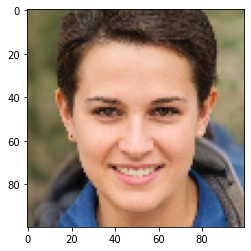

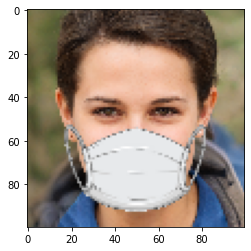

In [21]:
images, images2 = dataiter.next()
plt.figure()
plt.imshow(np.transpose(images2[0].numpy(), (1, 2, 0)))
plt.show()
plt.figure()
plt.imshow(np.transpose(images[0].numpy(), (1, 2, 0)))
plt.show()

In [27]:
images[0].size()

torch.Size([3, 100, 100])

In [28]:
images = torch.tensor(images).float()

In [30]:
test = model(images)
print(test.size())
test2 = test.detach().numpy()
loss_function(images, test)

RuntimeError: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor

In [29]:
plt.figure()
plt.imshow(np.transpose(test2[0], (1, 2, 0)).astype('uint8'))
plt.show()

NameError: name 'test2' is not defined

<Figure size 432x288 with 0 Axes>

In [43]:
len(dataset)

10000

## Load the data and the create the data loader

In [771]:
#create transformer
transformer=transforms.Compose([
                               transforms.Normalize((0, 0, 0), (1, 1, 1)),
                           ])

In [772]:
# Set up the data 
# load dataloader
dataset = DataLoader("../Data/50_with_mask", "../Data/50_without_mask",transform = transformer) 
# split the dataset
test_size = int(0.2 * len(dataset))
train_size = len(dataset) - test_size
test_train_split = [test_size, train_size]
test, traindata = torch.utils.data.random_split(dataset = dataset, lengths = test_train_split)

# Set up dataloader
batch_size = 25
trainloader = torch.utils.data.DataLoader(traindata, 
                                          batch_size=batch_size, 
                                          shuffle=True, 
                                          num_workers=0)
testloader = torch.utils.data.DataLoader(test, 
                                          batch_size=2, 
                                          shuffle=True, 
                                          num_workers=0)
dataiter = iter(trainloader)


In [773]:
print(len(traindata))

8000


In [161]:
# Set up the values for optimizing
loss_function = nn.MSELoss()
lr = 0.05
model = Net()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

nEpocs = 1

totaliter = 0
for epoch in range(nEpocs):
    print('epoch',epoch)
    running_loss = 0.0
    
    
    for i, data in enumerate(trainloader, 0):
        totaliter+=1
        
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = torch.tensor(inputs).float()
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize      
        outputs = model(inputs)
        print(outputs.type())
        labels = torch.tensor(labels).float()
        loss = loss_function(outputs, labels)
        print(loss)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        print(i, running_loss, loss.item())
        if (i % 100 == 0):
            print(i , running_loss, loss.item())

    print('Epoch %d, Train loss: %.3f' %(epoch + 1, running_loss / 100))
            
    running_loss = 0.0
print('Finished Training')

epoch 0
torch.FloatTensor
tensor(16678.6094, grad_fn=<MseLossBackward>)
0 16678.609375 16678.609375
0 16678.609375 16678.609375
torch.FloatTensor
tensor(2247051.7500, grad_fn=<MseLossBackward>)
1 2263730.359375 2247051.75
torch.FloatTensor
tensor(1.9510e+12, grad_fn=<MseLossBackward>)
2 1951034804914.3594 1951032541184.0
torch.FloatTensor
tensor(1.4495e+12, grad_fn=<MseLossBackward>)
3 3400569752242.3594 1449534947328.0
torch.FloatTensor
tensor(4.6683e+09, grad_fn=<MseLossBackward>)
4 3405238048434.3594 4668296192.0
Epoch 1, Train loss: 34052380484.344
Finished Training


torch.Size([2, 3, 100, 100])


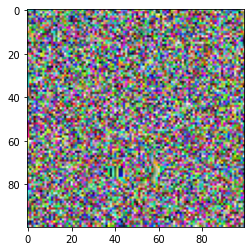

In [162]:
images, images2 = dataiter.next()
images = torch.tensor(images).float()
test = model(images)
print(test.size())
test2 = test.detach().numpy()
plt.figure()
plt.imshow(np.transpose(test2[0], (1, 2, 0)).astype('uint8'))
plt.show()

In [91]:
model2 = Net()
test3 = model2(images)
print(test3.type())

torch.FloatTensor


## Try again this time with encoder decoder setup.

In [774]:
# with auto encoder:

import torch.nn.functional as F
class ConvAutoencoder(nn.Module):
    def __init__(self):
        super(ConvAutoencoder, self).__init__()
           
        self.flatten = nn.Flatten()
        self.linear1 = nn.Linear(1728,2500)
        self.linear2 = nn.Linear(2500,1600)
        self.linear3 = nn.Linear(1600,1200)

        
        self.unflatten = nn.Unflatten(dim =1, unflattened_size = (12,10,10))
        #Encoder
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)  
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 44, 3, padding=1)
        self.conv4 = nn.Conv2d(44, 32, 3, padding=1)
        self.conv5 = nn.Conv2d(32, 16, 3, padding=1)
        self.conv6 = nn.Conv2d(16, 12, 3, padding=1)
       
        self.pool = nn.MaxPool2d(2, 2)
        
        #Decoder
        self.t_conv1 = nn.ConvTranspose2d(12, 16, 3, stride=3, padding= 2)
        self.t_conv2 = nn.ConvTranspose2d(16, 32, 3, stride=2, padding = 2)
        self.t_conv3 = nn.ConvTranspose2d(32, 16 , 3, stride=1, padding = 1)
        self.t_conv4 = nn.ConvTranspose2d(16, 8, 2, stride=1)
        self.t_conv5 = nn.ConvTranspose2d(8, 3, 3, stride=1, padding = 1)
    
    def encode(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = F.relu(self.conv5(x))
        x = self.pool(x)
        x = F.relu(self.conv6(x))
        return x
    # made flat layer deep to check if it would use more gpu.
    def flatlayer(self, x):
        x = self.flatten(x)
        x = F.relu(x)
        x = self.linear1(x)
        x = F.relu(x)
        x = self.linear2(x)
        x = F.relu(x)
        x = self.linear3(x)
        x = F.relu(x)
        return x
    
    def decode(self, x):
        x = self.unflatten(x)
        x = F.relu(self.t_conv1(x))
        x = F.relu(self.t_conv2(x))
        x = F.relu(self.t_conv3(x))
        x = F.relu(self.t_conv4(x))
        x = F.relu(self.t_conv5(x))
        return x
        
    def forward(self, x):
        x = self.encode(x)
        x = self.flatlayer(x)
        x = self.decode(x)      
        return x


#Instantiate the model
model = ConvAutoencoder()
print(model)




device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
#device = torch.device("cpu")
print(device)
model.to(device)

ConvAutoencoder(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear1): Linear(in_features=1728, out_features=2500, bias=True)
  (linear2): Linear(in_features=2500, out_features=1600, bias=True)
  (linear3): Linear(in_features=1600, out_features=1200, bias=True)
  (unflatten): Unflatten(dim=1, unflattened_size=(12, 10, 10))
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 44, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(44, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv6): Conv2d(16, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (t_conv1): ConvTranspose2d(12, 16, kernel_size=(3, 3), stride=(3, 3), padding=(2, 2))
  (t_conv2): ConvTranspose2d(16, 32,

ConvAutoencoder(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear1): Linear(in_features=1728, out_features=2500, bias=True)
  (linear2): Linear(in_features=2500, out_features=1600, bias=True)
  (linear3): Linear(in_features=1600, out_features=1200, bias=True)
  (unflatten): Unflatten(dim=1, unflattened_size=(12, 10, 10))
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 44, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(44, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv6): Conv2d(16, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (t_conv1): ConvTranspose2d(12, 16, kernel_size=(3, 3), stride=(3, 3), padding=(2, 2))
  (t_conv2): ConvTranspose2d(16, 32,

In [916]:
#Loss function
criterion = torch.nn.MSELoss()

#Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.00025)

In [917]:


#Epochs
n_epochs = 20
def train():
    for epoch in range(1, n_epochs+1):
        # monitor training loss
        train_loss = 0.0

        #Training
        for data in trainloader:
            mask_image, image = data
            mask_image , image = mask_image.to(device), image.to(device)
            image = torch.tensor(image).float()
            mask_image = torch.tensor(mask_image).float()
            optimizer.zero_grad()
            outputs = model(mask_image)
            loss = criterion(outputs, image)
            loss.backward()
            optimizer.step()
        if (epoch % 5 == 0):
            train_loss += loss.item()*images.size(0)
            train_loss = train_loss/len(trainloader)
            print('Epoch: {} \tTraining Loss: {:.6f}'.format(epoch, train_loss))
        
        

In [918]:
train()


Epoch: 5 	Training Loss: 1.111519
Epoch: 10 	Training Loss: 1.020599
Epoch: 15 	Training Loss: 0.972729
Epoch: 20 	Training Loss: 0.934326


In [748]:
%lprun -f train train()

Epoch: 1 	Training Loss: 12.061151
Epoch: 2 	Training Loss: 6.411458


In [722]:
import cProfile
import re
cProfile.run("train()")

Epoch: 1 	Training Loss: 13.648697
Epoch: 2 	Training Loss: 13.788072
         2238902 function calls (2226092 primitive calls) in 29.423 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      640    0.035    0.000    0.621    0.001 1556789372.py:32(encode)
      640    0.016    0.000    0.203    0.000 1556789372.py:43(flatlayer)
      640    0.025    0.000    0.547    0.001 1556789372.py:54(decode)
      640    0.003    0.000    1.374    0.002 1556789372.py:63(forward)
    16000    0.376    0.000   21.853    0.001 444890434.py:11(__getitem__)
        1    0.058    0.058   29.423   29.423 477256471.py:3(train)
        1    0.000    0.000   29.423   29.423 <string>:1(<module>)
      640    0.001    0.000    0.002    0.000 _VF.py:25(__getattr__)
      640    0.006    0.000    0.026    0.000 __init__.py:28(_make_grads)
      640    0.001    0.000    0.001    0.000 __init__.py:60(_tensor_or_tensors_to_tuple)
      640    0.005  

In [831]:

def print_image(image, model, correct_image):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    ax1.imshow(np.transpose(image.numpy(), (1, 2, 0)).astype('uint8'))
    ax2.imshow(np.transpose(correct_image.numpy(), (1, 2, 0)).astype('uint8'))
    image = torch.unsqueeze(image,0)
    image = torch.tensor(image).float()
    image = image.to(device)
    output = model(image)
    output = torch.squeeze(output,0)
    if device.type == 'cuda':
        output = torch.Tensor.cpu(output).detach().numpy()
    else:
        output = output.detach().numpy()
        

    ax3.imshow(np.transpose(output, (1, 2, 0)).astype('uint8'))
    plt.show()

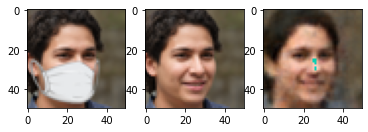

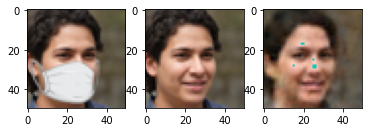

In [922]:
dataiter = iter(testloader)


images, images2 = dataiter.next()
print_image(images[0], model = model2, correct_image = images2[0])
print_image(images[0], model = model, correct_image = images2[0])

In [856]:
torch.save(model, "50_model_with_norm_150_epochs.pt")

In [830]:
model2 = torch.load("50_model2.pt")

In [608]:
print_image(images, model)

TypeError: print_image() missing 1 required positional argument: 'correct_image'

torch.Size([2, 3, 50, 50])


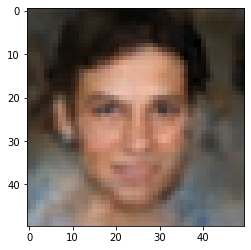

In [611]:

images = torch.tensor(images).float()
images = images.to(device)
test = model(images)
print(test.size())

test2 = torch.Tensor.cpu(test).detach().numpy()
plt.figure()
plt.imshow(np.transpose(test2[0], (1, 2, 0)).astype('uint8'))
plt.show()

In [ ]:
def print_image(image, model):
    image = torch.tensor(image).float()
    image = image.to(device)
    output = model(images)
    if device == "cuda":
        output = torch.Tensor.cpu(test).detach().numpy()
    else:
        test2 = test.detach().numpy()
    plt.figure()
    plt.imshow(np.transpose(test2[0], (1, 2, 0)).astype('uint8'))
    plt.show()

In [605]:
model1 = torch.load("50_model_1.pt")

tensor([[[169, 165, 152,  ..., 174, 170, 167],
         [169, 168, 150,  ..., 171, 169, 166],
         [165, 164, 147,  ..., 140, 140, 141],
         ...,
         [134, 134, 135,  ...,  30,  36,  68],
         [135, 134, 134,  ...,  25,  29,  64],
         [136, 133, 132,  ...,  28,  35,  48]],

        [[157, 148,  99,  ..., 166, 162, 159],
         [158, 150,  98,  ..., 164, 163, 159],
         [154, 145,  94,  ..., 128, 126, 126],
         ...,
         [129, 129, 130,  ...,  22,  24,  48],
         [131, 130, 128,  ...,  18,  19,  46],
         [132, 128, 127,  ...,  19,  23,  31]],

        [[139, 129,  65,  ..., 151, 148, 149],
         [140, 130,  63,  ..., 149, 149, 147],
         [135, 126,  60,  ..., 109, 107, 108],
         ...,
         [120, 120, 123,  ...,  18,  19,  41],
         [124, 123, 120,  ...,  15,  15,  39],
         [125, 121, 120,  ...,  15,  18,  26]]], dtype=torch.uint8)


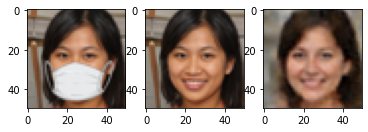

In [624]:
img = read_image("../Data/50_with_mask/with-mask-default-mask-seed5009.png")
img2 = read_image("../Data/50_without_mask/seed5009.png")
print(img)
print_image(img, model1, img2)

In [863]:
torch.jit.save(torch.jit.trace(model, (x)), "model_test.pth")
loaded_model = torch.jit.load("model.pth")

NameError: name 'x' is not defined